<a href="https://colab.research.google.com/github/m-zia-rasa/Potato_Disease_Detection/blob/main/Potato_Disease_Detection_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Potato Disease Detection Project
================================
M.Zia Rasa

### **Colab envirnoment set-up with Kaggle**

In [ ]:
# install kaggle
!pip install -q kaggle

In [ ]:
# upload the kaggle.json file here
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mziarasa","key":"af317603fd4a195a296c4e4a171376a2"}'}

In [ ]:
# make a folder to copy the kaggle.json file here
! mkdir ~/.kaggle

In [ ]:
# copy the kaggle.json to the folder you created
! cp kaggle.json ~/.kaggle/

In [ ]:
# give privileges to the json file
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# download the Potato disease from Kaggle
! kaggle datasets download -d ashokkumarpalivela/potato-diseases

 98% 37.0M/37.8M [00:02<00:00, 13.6MB/s]
100% 37.8M/37.8M [00:02<00:00, 13.4MB/s]


In [ ]:
# unzipe the downloaded zip file
!unzip potato-diseases.zip

Archive:  potato-diseases.zip
  inflating: data/Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG  
  inflating: data/Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG  
  inflating: data/Early_blight/009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG  
  inflating: data/Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG  
  inflating: data/Early_blight/0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG  
  inflating: data/Early_blight/02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG  
  inflating: data/Early_blight/0267d4ca-522e-4ca0-b1a2-ce925e5b54a2___RS_Early.B 7020.JPG  
  inflating: data/Early_blight/028f9b73-142f-499a-9c7b-d7c1ed5e5506___RS_Early.B 8546.JPG  
  inflating: data/Early_blight/034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___RS_Early.B 7136.JPG  
  inflating: data/Early_blight/03b0d3c1-b5b0-48f4-98aa-f8904670290f___RS_Early.B 7051.JPG  
  inflating: data/Early_blight/042135e2-e126-4900-

### **Let's explore our datasets.**

Let's import some important python modules and libraries.

In [ ]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from sklearn.metrics import confusion_matrix

Lets's define our repeatedly used terms as variables

In [ ]:
data_dir = "data"
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=32

Let's import our data into Tensorflow data sets

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


Let's see our classe's names

In [ ]:
class_names = dataset.class_names
class_names

['Early_blight', 'Healthy', 'Late_blight']

**Let's see the classe's histogram**

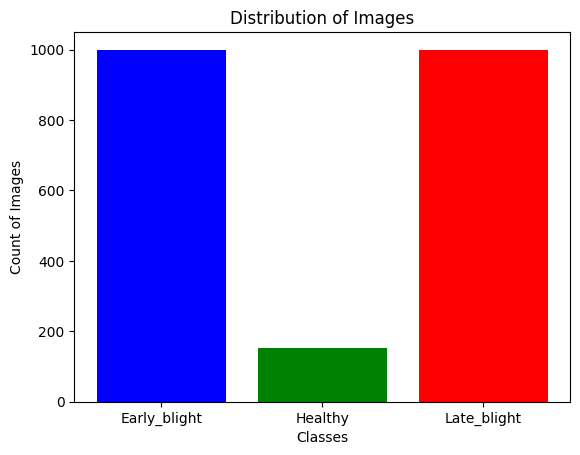

In [ ]:
import matplotlib.pyplot as plt

classes = ['Early_blight', 'Healthy', 'Late_blight']
counts = [1000, 152, 1000]

plt.bar(classes, counts, color=['blue', 'green', 'red'])
plt.xlabel('Classes')
plt.ylabel('Count of Images')
plt.title('Distribution of Images')
plt.show()

**Let's display one image's shape**

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[2 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 2 0 2 0 2 0 0 2 0 0 1 2 2 0 0]


Now let's visualize some of our images

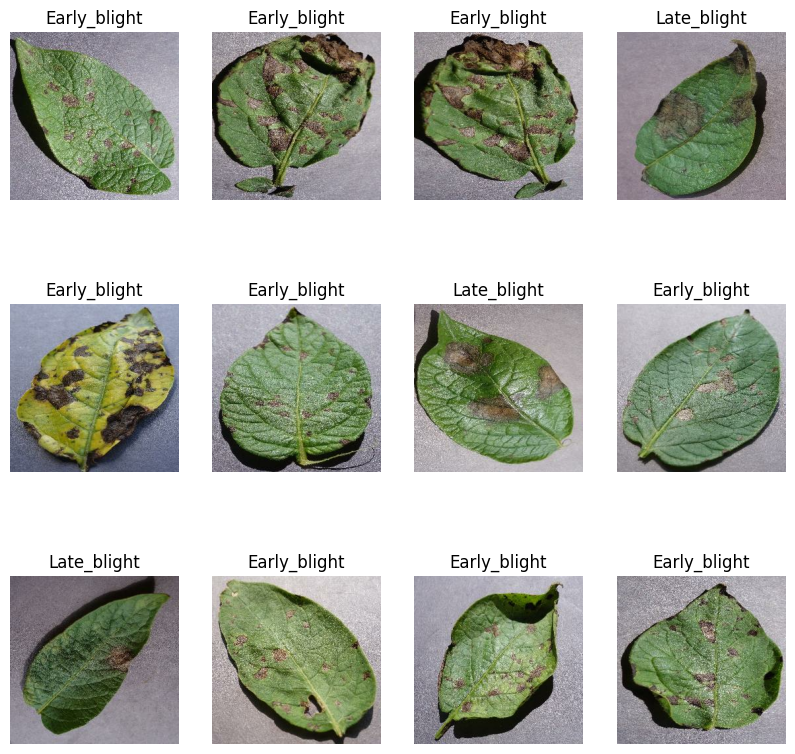

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

### **Let's splite our data into three parts**

Here, we splite our training dataset

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
    )
len(train_ds)

Found 2152 files belonging to 3 classes.
Using 1722 files for training.


54

Here, we splite our valication dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
len(val_ds)

Found 2152 files belonging to 3 classes.
Using 430 files for validation.


14

Here, we hava our final dataset

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
len(test_ds)

Found 2152 files belonging to 3 classes.
Using 215 files for validation.


7

Let's visualize the three data sets

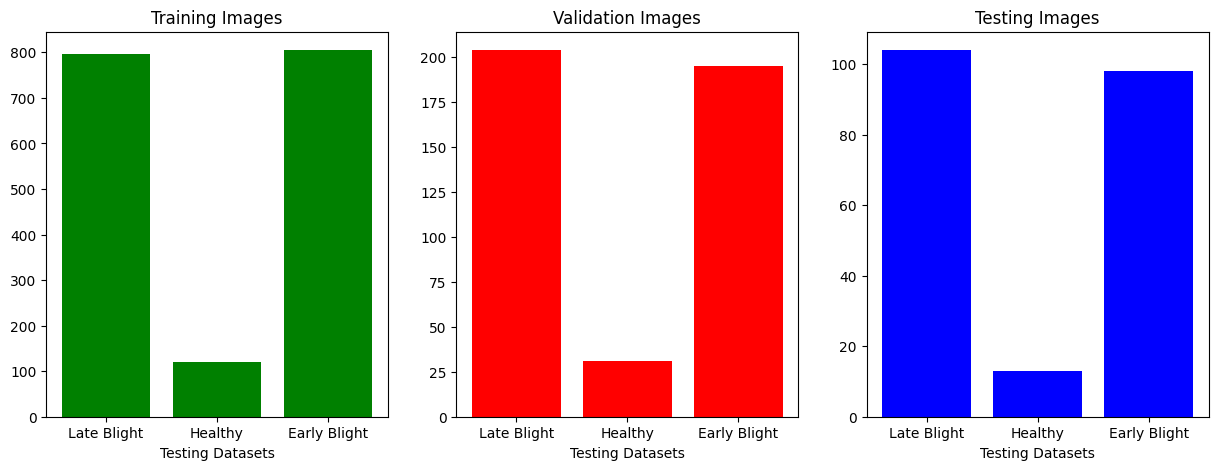

In [ ]:
categories = ['Late Blight', 'Healthy', 'Early Blight']
def count_categories(dataset):
    category_counts = {category: 0 for category in categories}
    for _, labels in dataset:
        for label in labels.numpy():
            category_counts[categories[label]] += 1
    return category_counts

train_category_counts = count_categories(train_ds)
val_category_counts = count_categories(val_ds)
test_category_counts = count_categories(test_ds)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].bar(train_category_counts.keys(), train_category_counts.values(), color='green')
axs[0].set_title('Training Images')
axs[0].set_xlabel('Testing Datasets')

axs[1].bar(val_category_counts.keys(), val_category_counts.values(), color='red')
axs[1].set_title('Validation Images')
axs[1].set_xlabel('Testing Datasets')

axs[2].bar(test_category_counts.keys(), test_category_counts.values(), color='blue')
axs[2].set_title('Testing Images')
axs[2].set_xlabel('Testing Datasets')

plt.show()

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

    train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

14

In [ ]:
len(test_ds)

7

### **Third, Let's Cache, Shuffle, and Prefetch the Dataset for better performance**

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## **Fourth, Let's use Data Normalization and augmentation techniques**

**First, let's normalize and resize our images**

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

**Second, let's aument our images**

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

**Now, let's applay the data augmentation on our traning dataset**

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)

).prefetch(buffer_size=tf.data.AUTOTUNE)

### **Fifth, Let's build our CNN Model Architecture**

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.InputLayer(input_shape=input_shape),

    # changing Kernal size to (3,4,5)
    layers.Conv2D(32, kernel_size = 5, activation='relu'),
    # changing MaxPoolingSize to (2,4)
    layers.MaxPooling2D(pool_size = 5),

    # changing Kernal size to (3,4,5)
    layers.Conv2D(64, kernel_size = 5, activation='relu'),
    # changing MaxPoolingSize to (2,4)
    layers.MaxPooling2D(pool_size = 5),

    # changing Kernal size to (3,4,5)
    layers.Conv2D(128, kernel_size = 5, activation='relu'),
    # changing MaxPoolingSize to (2,4)
    layers.MaxPooling2D(pool_size = 5),

    layers.Flatten(),
    # find tunning the last layer (16,32,64,128)
    layers.Dense(32, activation='relu'),

    # adding a drop out layer.
    layers.Dropout(0.5),

    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 input_1 (InputLayer)        multiple                  0         
                                                                 
 conv2d (Conv2D)             (32, 252, 252, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (32, 50, 50, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 46, 46, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 9, 9, 64)            0         
 g2D)                                                 

In [ ]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD

# Load the pre-trained ResNet50 model without the fully connected layers
base_model = ResNet50(weights='imagenet', include_top=False)

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Now you can use this model to train on your own dataset

94765736/94765736 [==============================] - 0s 0us/step


### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/32
54/54 [==============================] - 73s 593ms/step - loss: 0.4006 - accuracy: 0.9059 - val_loss: 74.2371 - val_accuracy: 0.2326
Epoch 2/32
54/54 [==============================] - 25s 452ms/step - loss: 0.1003 - accuracy: 0.9628 - val_loss: 8.8534 - val_accuracy: 0.6326
Epoch 3/32
54/54 [==============================] - 24s 448ms/step - loss: 0.0639 - accuracy: 0.9774 - val_loss: 75.1895 - val_accuracy: 0.4791
Epoch 4/32
54/54 [==============================] - 24s 447ms/step - loss: 0.0822 - accuracy: 0.9698 - val_loss: 208.1863 - val_accuracy: 0.4744
Epoch 5/32
54/54 [==============================] - 24s 444ms/step - loss: 0.0481 - accuracy: 0.9791 - val_loss: 0.2155 - val_accuracy: 0.9442
Epoch 6/32
54/54 [==============================] - 25s 451ms/step - loss: 0.0122 - accuracy: 0.9954 - val_loss: 0.2687 - val_accuracy: 0.9442
Epoch 7/32
54/54 [==============================] - 24s 444ms/step - loss: 0.0382 - accuracy: 0.9878 - val_loss: 4.9107 - val_accuracy: 0.

In [ ]:
scores = model.evaluate(train_ds)

54/54 [==============================] - 50s 917ms/step - loss: 0.0319 - accuracy: 0.9884


In [ ]:
scores = model.evaluate(val_ds)

14/14 [==============================] - 10s 685ms/step - loss: 0.1126 - accuracy: 0.9651


In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 32, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
type(history.history['loss'])

list

In [ ]:
len(history.history['loss'])

32

In [ ]:
history.history['loss'][:5]

[0.9313017129898071,
 0.8431379199028015,
 0.5914427042007446,
 0.4282552897930145,
 0.4530123472213745]

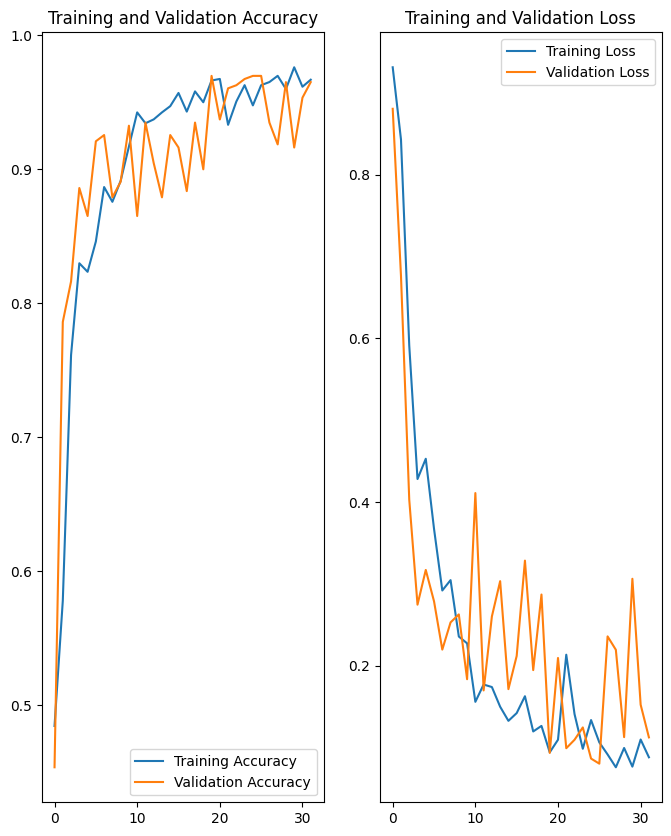

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 10))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 368ms/step


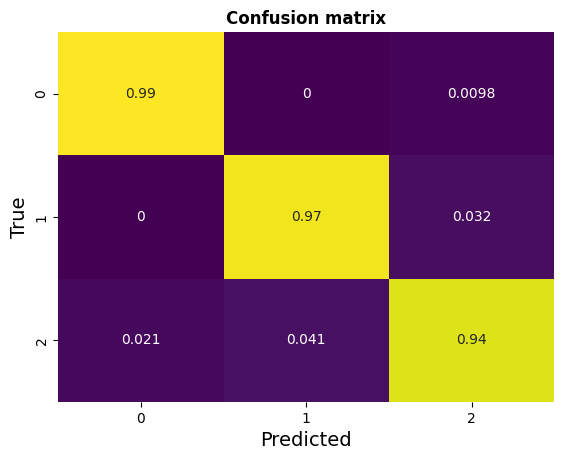

In [ ]:
y_pred = []
y_true = []

for image_batch, label_batch in val_ds:

   y_true.append(label_batch)
   preds = model.predict(image_batch)
   y_pred.append(np.argmax(preds, axis = - 1))

correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

cm = confusion_matrix(correct_labels, predicted_labels, normalize='true')

sns.heatmap(cm, annot=True, cmap='viridis', cbar=None)

plt.title("Confusion matrix", fontweight='bold')
plt.ylabel("True", fontsize=14)
plt.xlabel("Predicted", fontsize=14)

plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(correct_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       204
           1       0.79      0.97      0.87        31
           2       0.98      0.94      0.96       195

    accuracy                           0.97       430
   macro avg       0.92      0.97      0.94       430
weighted avg       0.97      0.97      0.97       430



### Run prediction on a sample image

first image to predict
actual label: Early_blight
1/1 [==============================] - 0s 33ms/step
predicted label: Healthy


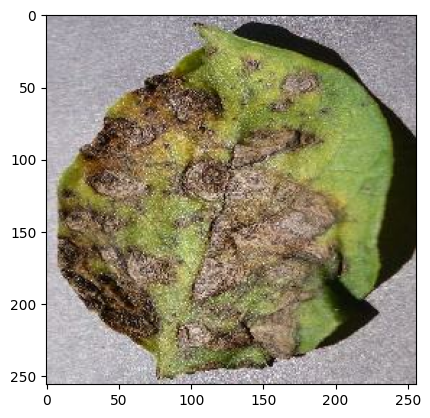

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

**Finally, let's run a function to see a few images perdictions**

1/1 [==============================] - 0s 35ms/step


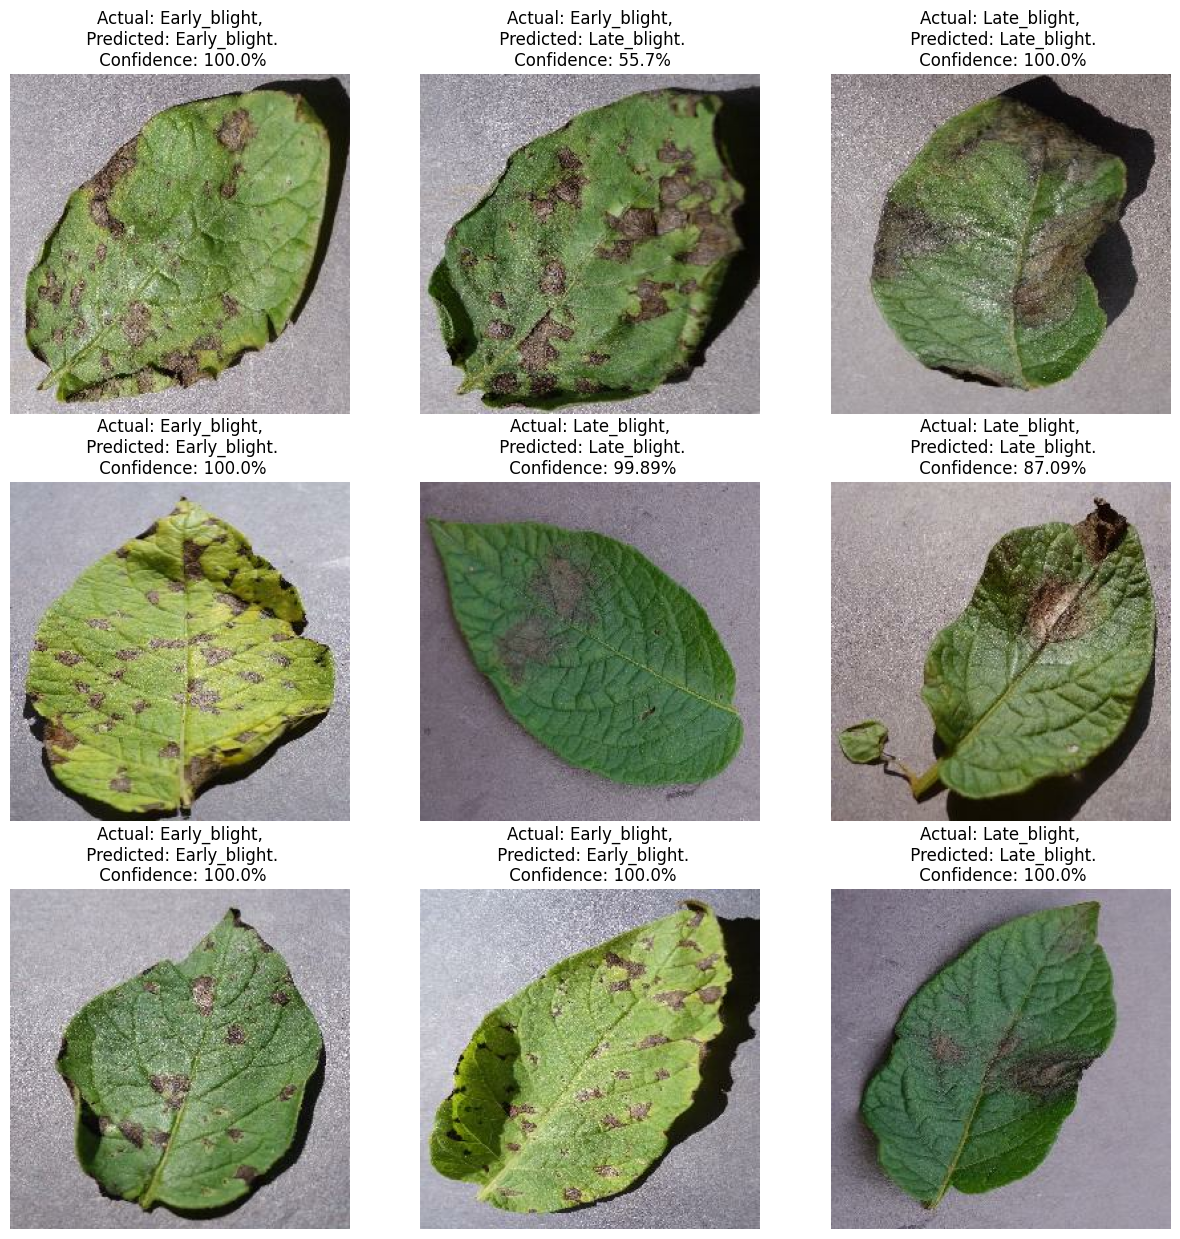

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

### **Thank you very much**
 **Coding helper resources: Github, Numpy, Tensor and Keras official documentatons**